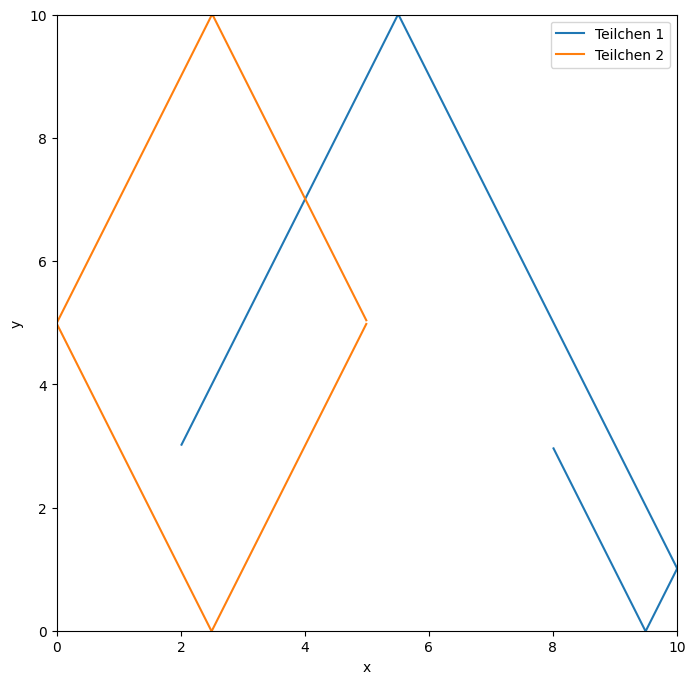

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10  # Boxgröße
m1, m2 = 1.0, 1.0  # Massen der Teilchen
r1, r2 = 0.5, 0.5  # Radius der Teilchen
v1 = np.array([1.0, 2.0])  # Geschwindigkeit von Teilchen 1
v2 = np.array([-1.0, -2.0])  # Geschwindigkeit von Teilchen 2
x1 = np.array([2.0, 3.0])  # Position von Teilchen 1
x2 = np.array([5.0, 5.0])  # Position von Teilchen 2
dt = 0.01  # Zeitschritt

# Funktion zur Kollisionserkennung
def check_collision(x1, x2, r1, r2):
    distance = np.linalg.norm(x1 - x2)
    return distance < (r1 + r2)

# Funktion zur Reflexion an den Wänden
def reflect(x, v, L):
    if x[0] <= 0 or x[0] >= L:
        v[0] = -v[0]
        x[0] = np.clip(x[0], 0, L)
    if x[1] <= 0 or x[1] >= L:
        v[1] = -v[1]
        x[1] = np.clip(x[1], 0, L)
    return x, v

# Funktion zur Berechnung des elastischen Stoßes
def elastic_collision(v1, v2, m1, m2, x1, x2):
    normal = (x2 - x1) / np.linalg.norm(x2 - x1)
    v1_new = v1 - (2 * m2 / (m1 + m2)) * np.dot(v1 - v2, normal) * normal
    v2_new = v2 - (2 * m1 / (m1 + m2)) * np.dot(v2 - v1, normal) * normal
    return v1_new, v2_new

# Simulation
positions_1 = []
positions_2 = []

for t in range(1000):
    if check_collision(x1, x2, r1, r2):
        v1, v2 = elastic_collision(v1, v2, m1, m2, x1, x2)
    
    x1 += v1 * dt
    x2 += v2 * dt
    
    x1, v1 = reflect(x1, v1, L)
    x2, v2 = reflect(x2, v2, L)

    positions_1.append(x1.copy())
    positions_2.append(x2.copy())

# Visualisierung der Bewegung
positions_1 = np.array(positions_1)
positions_2 = np.array(positions_2)

plt.figure(figsize=(8, 8))
plt.plot(positions_1[:, 0], positions_1[:, 1], label='Teilchen 1')
plt.plot(positions_2[:, 0], positions_2[:, 1], label='Teilchen 2')
plt.xlim(0, L)
plt.ylim(0, L)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import numpy as np
